# Feature Extraction with Eigen Face

<img src=components/feature_extraction.png>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2

from sklearn.decomposition import PCA

import pickle

In [36]:
# Load data
data = pickle.load(open('data/data_images_100_100.pickle', 'rb'))
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female
1,0.129412,0.094118,0.121569,0.113725,0.109804,0.117647,0.113725,0.129412,0.137255,0.125490,...,0.184314,0.117647,0.137255,0.090196,0.105882,0.105882,0.141176,0.207843,0.070588,female
2,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female
3,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529,female
4,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,0.066667,0.066667,0.062745,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.058824,...,0.870588,0.898039,0.913725,0.917647,0.929412,0.925490,0.921569,0.917647,0.913725,male
5394,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,male
5396,0.701961,0.705882,0.705882,0.709804,0.713725,0.717647,0.713725,0.705882,0.709804,0.713725,...,0.549020,0.537255,0.556863,0.580392,0.607843,0.647059,0.674510,0.690196,0.729412,male
5397,0.149020,0.145098,0.145098,0.149020,0.152941,0.156863,0.152941,0.149020,0.149020,0.152941,...,0.125490,0.113725,0.117647,0.149020,0.192157,0.223529,0.243137,0.258824,0.270588,male


## Eigen Face

In [37]:
X = data.drop('gender', axis=1).values
X

array([[0.7254902 , 0.71372549, 0.71764706, ..., 0.4627451 , 0.45882353,
        0.43529412],
       [0.12941176, 0.09411765, 0.12156863, ..., 0.14117647, 0.20784314,
        0.07058824],
       [0.7254902 , 0.71372549, 0.71764706, ..., 0.4627451 , 0.45882353,
        0.43529412],
       ...,
       [0.70196078, 0.70588235, 0.70588235, ..., 0.6745098 , 0.69019608,
        0.72941176],
       [0.14901961, 0.14509804, 0.14509804, ..., 0.24313725, 0.25882353,
        0.27058824],
       [0.71372549, 0.71764706, 0.72156863, ..., 0.74509804, 0.74509804,
        0.74509804]])

In [38]:
mean_face = X.mean(axis=0) ## flatten mean face
mean_face.shape

(10000,)

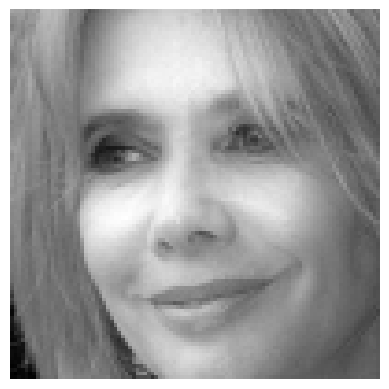

In [39]:
plt.imshow(mean_face.reshape((100, 100)), cmap='gray')
plt.axis('off')
plt.show()

## Subtract data with the mean face

In [40]:
X_t = X - mean_face ## subtract mean face

## Apply data to PCA


- Find the right number of components - elbow
- With right number of component compute the PCA

In [41]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [42]:
exp_var = pd.DataFrame()
exp_var['explained_var'] = pca.explained_variance_ratio_
exp_var['cumulative_var'] = pca.explained_variance_ratio_.cumsum()
exp_var['principal_component'] = np.arange(1, len(exp_var) + 1)
exp_var.head()

,explained_var,cumulative_var,principal_component
0,0.338919,0.338919,1
1,0.100360,0.439280,2
2,0.087866,0.527145,3
3,0.065855,0.593000,4
4,0.038108,0.631109,5


<Axes: title={'center': 'Cumulative Explained Variance'}>

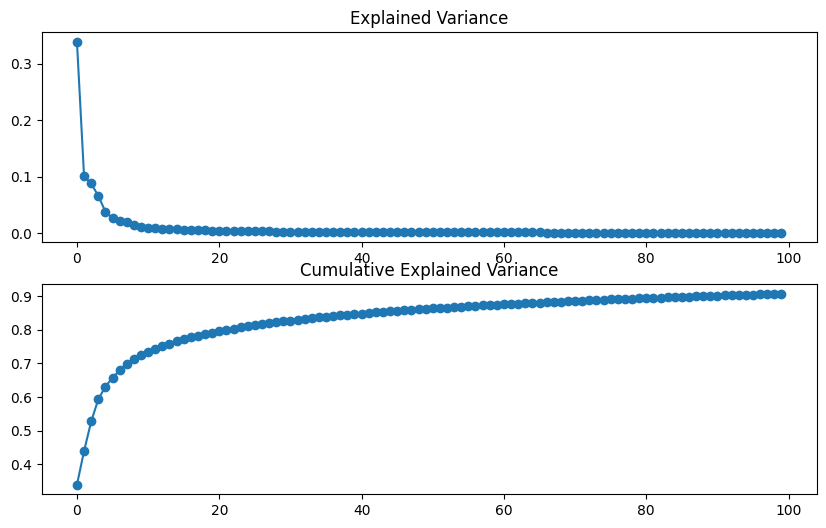

In [43]:
fig, ax = plt.subplots(figsize=(10, 6), nrows = 2)

exp_var['explained_var'].head(100).plot(kind='line', marker= 'o', ax=ax[0], title='Explained Variance')
exp_var['cumulative_var'].head(100).plot(kind='line', marker = 'o', ax=ax[1], title='Cumulative Explained Variance')

with 50 components we get 80% of the variance

In [44]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)
pca_data.shape

(9690, 50)

In [46]:
y = data['gender'].values
np.savez('data/pca_data_target.npz', pca_data=pca_data, y=y)


In [47]:
pca_dict = {}
pca_dict['pca'] = pca_50
pca_dict['mean_face'] = mean_face

In [50]:
import pickle
pickle.dump(pca_dict, open('model/pca_dict.pickle', 'wb'))